In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df = pd.read_csv('NSE-BSE.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,707.0,707.95,681.0,682.65,683.10,131700.0,910.52
1,2018-09-27,716.8,723.50,691.1,697.80,697.15,156222.0,1104.25
2,2018-09-26,720.0,724.40,709.0,710.00,711.60,71780.0,513.48
3,2018-09-25,725.0,725.00,710.5,715.00,718.15,93181.0,668.03
4,2018-09-24,725.3,728.00,712.0,721.00,721.90,126374.0,911.15


In [3]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]


In [4]:
from fastai.tabular import add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed',axis=1, inplace=True)
new_data.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,1069.2,2017,2,5,3,4,34,False,False,False,False,False,False
1,1029.2,2017,2,6,6,0,37,False,False,False,False,False,False
2,1006.8,2017,2,6,7,1,38,False,False,False,False,False,False
3,1022.6,2017,2,6,8,2,39,False,False,False,False,False,False
4,1010.05,2017,2,6,9,3,40,False,False,False,False,False,False


In [5]:
#Identifies whether a given day is Monday/Friday or Tuesday/Wednesday/Thursday.
new_data['mon_fri'] = 0
for i in range(0, len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

/home/enigma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/enigma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [6]:
#split into train and validation
train = new_data[:328]
valid = new_data[328:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

46.010512366274455

/home/enigma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/enigma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


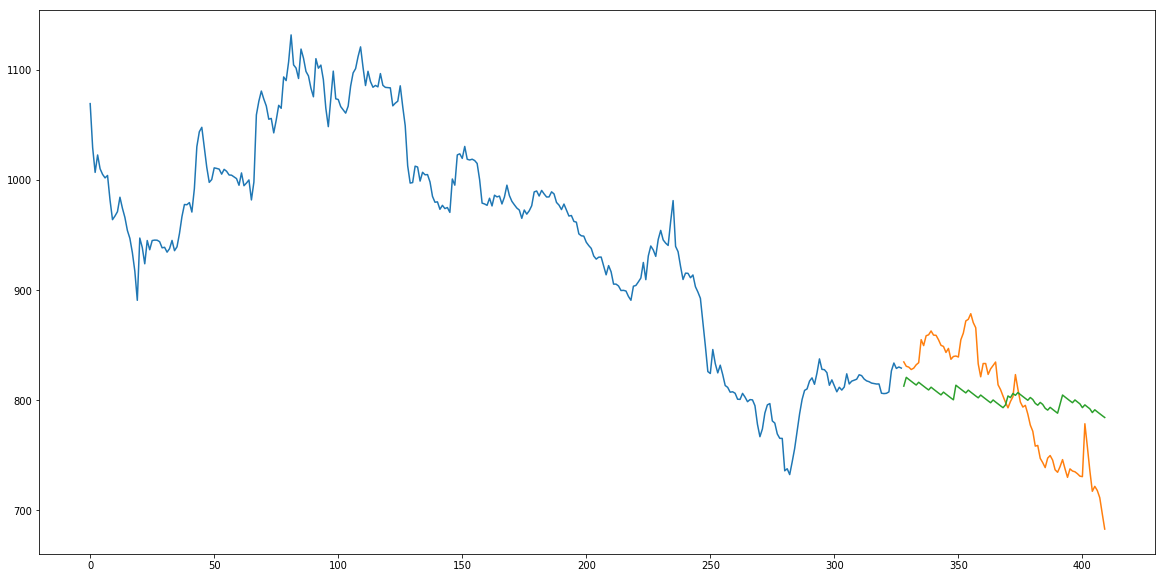

In [8]:
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[328:].index
train.index = new_data[:328].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [47]:
pre = np.array('preds')
pre

array('preds', dtype='<U5')

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid.values,pre)

TypeError: Singleton array array('preds', dtype='<U5') cannot be considered a valid collection.

In [26]:
preds.round()

array([813., 821., 819., 817., ..., 790., 788., 786., 784.])